# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 5

Group Members:
- Kayla Namira Mariadi (13522050)
- Andhita Naura Hariyanto (13522060)
- Salsabiila (13522062)
- Shulha (13522087)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
# Import other libraries if needed

## Import Dataset

In [2]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public
# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')

unsw_nb15_features_modified_df = pd.read_csv('dataset/train/UNSW-NB15_features-modified.csv')
flow_features_train_df = pd.read_csv('dataset/train/flow_features_train.csv')
basic_features_train_df = pd.read_csv('dataset/train/basic_features_train.csv')
content_features_train_df = pd.read_csv('dataset/train/content_features_train.csv')
time_features_train_df = pd.read_csv('dataset/train/time_features_train.csv')
additional_features_train_df = pd.read_csv('dataset/train/additional_features_train.csv')
labels_train_df = pd.read_csv('dataset/train/labels_train.csv')

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

##### Data Size

In [3]:
# Number of Rows (Excluding Header)
print("Number of Data Entries (Row) for Each Data Frame\n")

# time_features_train
print(f"time_features_train: {len(time_features_train_df)}")

# labels_train
print(f"labels_train: {len(labels_train_df)}")

# flow_features_train
print(f"flow_features_train: {len(flow_features_train_df)}")

# content_features_train
print(f"content_features_train: {len(content_features_train_df)}")

# basic_features_train
print(f"basic_features_train: {len(basic_features_train_df)}")

# additional_features_train
print(f"additional_features_train: {len(additional_features_train_df)}")

Number of Data Entries (Row) for Each Data Frame

time_features_train: 175341
labels_train: 175341
flow_features_train: 175341
content_features_train: 175341
basic_features_train: 175341
additional_features_train: 175341


##### Data Types

In [4]:
# Data Type
print("Data Type for Each Feature Data Frame\n")

# time_features_train
print("time_features_train")
print(time_features_train_df.dtypes)
print()

# labels_train
print("labels_train")
print(labels_train_df.dtypes)
print()

# flow_features_train
print("flow_features_train")
print(flow_features_train_df.dtypes)
print()

# content_features_train
print("content_features_train")
print(content_features_train_df.dtypes)
print()

# basic_features_train
print("basic_features_train")
print(basic_features_train_df.dtypes)
print()

# additional_features_train
print("additional_features_train")
print(additional_features_train_df.dtypes)

Data Type for Each Feature Data Frame

time_features_train
sjit      float64
djit      float64
sinpkt    float64
dinpkt    float64
tcprtt    float64
synack    float64
ackdat    float64
id          int64
dtype: object

labels_train
attack_cat    object
label          int64
id             int64
dtype: object

flow_features_train
proto    object
id        int64
dtype: object

content_features_train
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
id                     int64
dtype: object

basic_features_train
state       object
dur        float64
sbytes     float64
dbytes     float64
sttl       float64
dttl       float64
sloss      float64
dloss      float64
service     object
sload      float64
dload      float64
spkts      float64
dpkts      float64
id           int64
dtype: object

additional_features_tra

In summary,
1. Flow: All attribute Categorical
2. Basic: Categorical (state, service), Numerical (the rest)
3. Content: All attribute Numerical
4. Time: All attribute Numerical
5. Additional: Categorical-Binary (is_sm_ips_ports, is_ftp_login), Numerical (the rest)
6. Label: Categorical (attack_cat, label-binary)

##### Data Statistics (Numerical)

In [5]:
# For time_features_train_df (numeric columns only)
print("\nStatistics for time_features_train_df (Numeric Columns):")
print(time_features_train_df.select_dtypes(include=['number']).describe())

# For labels_train_df (numeric columns only)
print("\nStatistics for labels_train_df (Numeric Columns):")
print(labels_train_df.select_dtypes(include=['number']).describe())

# For flow_features_train_df (numeric columns only)
print("\nStatistics for flow_features_train_df (Numeric Columns):")
print(flow_features_train_df.select_dtypes(include=['number']).describe())

# For content_features_train_df (numeric columns only)
print("\nStatistics for content_features_train_df (Numeric Columns):")
print(content_features_train_df.select_dtypes(include=['number']).describe())

# For basic_features_train_df (numeric columns only)
print("\nStatistics for basic_features_train_df (Numeric Columns):")
print(basic_features_train_df.select_dtypes(include=['number']).describe())

# For additional_features_train_df (numeric columns only)
print("\nStatistics for additional_features_train_df (Numeric Columns):")
print(additional_features_train_df.select_dtypes(include=['number']).describe())



Statistics for time_features_train_df (Numeric Columns):
               sjit           djit         sinpkt         dinpkt  \
count  1.666030e+05  166495.000000  166634.000000  166607.000000   
mean   4.993982e+03     604.891720     987.360974      87.763617   
std    4.506783e+04    4082.439167    7246.462797     987.040024   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    0.000000e+00       0.000000       0.008000       0.000000   
50%    0.000000e+00       0.000000       0.284723       0.006000   
75%    2.511184e+03     114.753348      55.205806      50.933127   
max    1.460480e+06  289388.269700   84371.496000   56716.824000   

              tcprtt         synack         ackdat             id  
count  166505.000000  166605.000000  166746.000000  175341.000000  
mean        0.041331       0.021042       0.020402   87670.000000  
std         0.079428       0.043560       0.040619   50616.731112  
min         0.000000       0.000000       0.000000       

##### Data Unique Values (Categorical)

In [6]:
# Unique Values for Categorical Features
print("Unique Values for Categorical Features\n")

# labels_train
print("labels_train")
non_numeric_labels = labels_train_df.select_dtypes(exclude=[np.number])
print(non_numeric_labels.nunique())
print()

# flow_features_train
print("flow_features_train")
non_numeric_flow = flow_features_train_df.select_dtypes(exclude=[np.number])
print(non_numeric_flow.nunique())
print()

# basic_features_train
print("basic_features_train")
non_numeric_basic = basic_features_train_df.select_dtypes(exclude=[np.number])
print(non_numeric_basic.nunique())
print()

Unique Values for Categorical Features

labels_train
attack_cat    10
dtype: int64

flow_features_train
proto    133
dtype: int64

basic_features_train
state       9
service    13
dtype: int64



##### Missing Values

Missing Values for Each Feature in Each Data Frame

time_features_train
sjit      8738
djit      8846
sinpkt    8707
dinpkt    8734
tcprtt    8836
synack    8736
ackdat    8595
id           0
dtype: int64

labels_train
attack_cat    0
label         0
id            0
dtype: int64

flow_features_train
proto    8826
id          0
dtype: int64

content_features_train
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
id                      0
dtype: int64

basic_features_train
state      8805
dur        8722
sbytes     8561
dbytes     8869
sttl       8825
dttl       8654
sloss      8794
dloss      8978
service    8791
sload      8786
dload      8837
spkts      8654
dpkts      8686
id            0
dtype: int64

additional_features_train
is_sm_ips_ports     8746
ct_state_ttl        8635
ct_flw_http_mthd    8647
is_ftp_login        8647
c

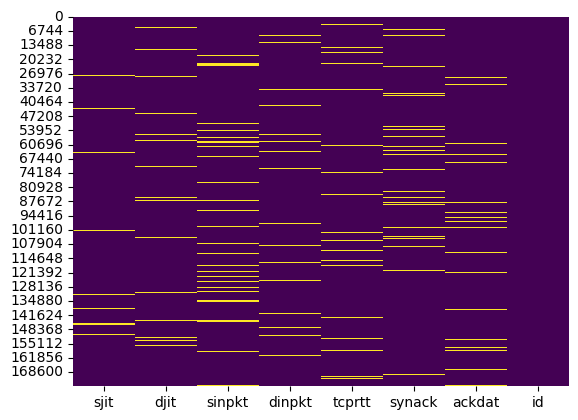

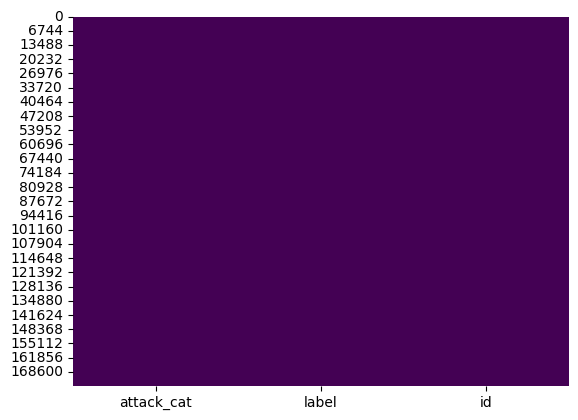

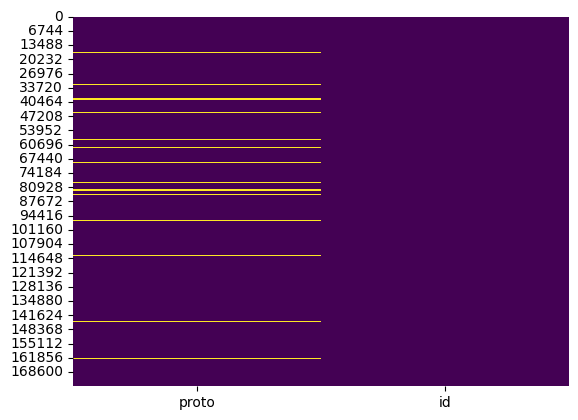

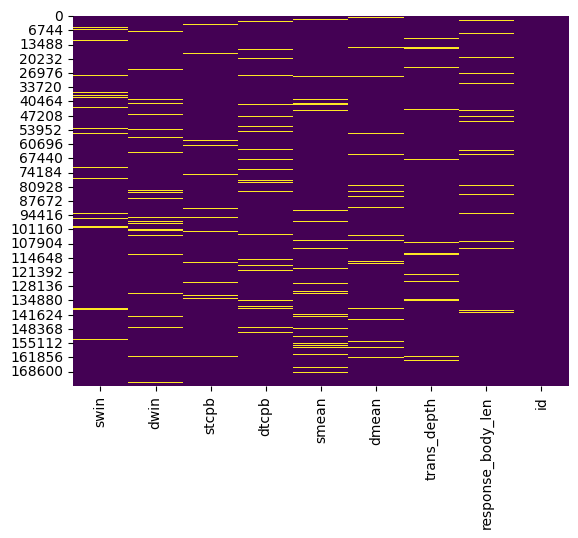

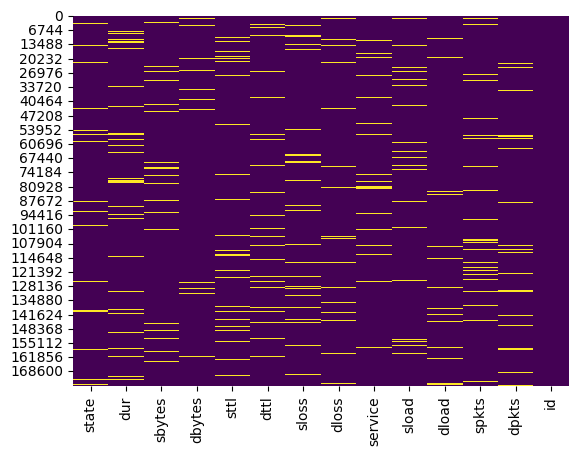

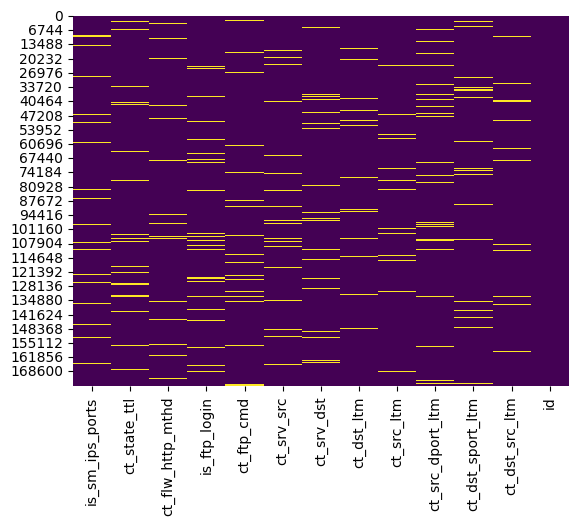

In [7]:
# Missing Values
print("Missing Values for Each Feature in Each Data Frame\n")
# time_features_train
print("time_features_train")
print(time_features_train_df.isnull().sum())
print()

# labels_train
print("labels_train")
print(labels_train_df.isnull().sum())
print()

# flow_features_train
print("flow_features_train")
print(flow_features_train_df.isnull().sum())
print()

# content_features_train
print("content_features_train")
print(content_features_train_df.isnull().sum())
print()

# basic_features_train
print("basic_features_train")
print(basic_features_train_df.isnull().sum())
print()

# additional_features_train
print("additional_features_train")
print(additional_features_train_df.isnull().sum())
print()

sns.heatmap(time_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(labels_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(flow_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(content_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(basic_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()
sns.heatmap(additional_features_train_df.isnull(), cbar=False, cmap="viridis")
plt.show()

Missing datas are about 8000 to 9000 rows from more than 170000 data for each attribute, this shows less than 5% data of each attribute is missing.

##### Outliers

In [8]:
def find_outliers_iqr(df):
    for col in df.select_dtypes(include=['number']).columns:
        if col.lower() in ['id']:  # Skip columns named 'no' or 'id'
              continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        max = df[col].max()
        # Find outliers below lower bound and above upper bound
        below_lower = df[df[col] < lower_bound].index.tolist()
        above_upper = df[df[col] > upper_bound].index.tolist()

        # Print outlier information for each column
        print(f"Column: {col}")
        print(f"  Q1: {Q1}")
        print(f"  Q3: {Q3}")
        print(f"  IQR {IQR}")
        print(f"  Max: {max}")
        print(f"  Lower Bound: {lower_bound}")
        print(f"  Upper Bound: {upper_bound}")
        print(f"  Outliers Below Lower Bound: {len(below_lower)}")
        print(f"  Outliers Above Upper Bound: {len(above_upper)}")
        print(f"  Total Outliers: {len(below_lower) + len(above_upper)}\n")

In [9]:
print("Outliers for Each Feature in Each Data Frame using +/- 1.5 IQR Method\n")

print("time_features_train")
find_outliers_iqr(time_features_train_df)
print()

print("labels_train")
find_outliers_iqr(labels_train_df)
print()

print("flow_features_train")
find_outliers_iqr(flow_features_train_df)
print()

print("content_features_train")
find_outliers_iqr(content_features_train_df)
print()

print("basic_features_train")
find_outliers_iqr(basic_features_train_df)
print()

print("additional_features_train")
find_outliers_iqr(additional_features_train_df)
print()

Outliers for Each Feature in Each Data Frame using +/- 1.5 IQR Method

time_features_train
Column: sjit
  Q1: 0.0
  Q3: 2511.1839655000003
  IQR 2511.1839655000003
  Max: 1460480.016
  Lower Bound: -3766.7759482500005
  Upper Bound: 6277.959913750001
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 17146
  Total Outliers: 17146

Column: djit
  Q1: 0.0
  Q3: 114.753348
  IQR 114.753348
  Max: 289388.2697
  Lower Bound: -172.130022
  Upper Bound: 286.88337
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 19538
  Total Outliers: 19538

Column: sinpkt
  Q1: 0.008
  Q3: 55.205805749999996
  IQR 55.19780574999999
  Max: 84371.496
  Lower Bound: -82.788708625
  Upper Bound: 138.00251437499998
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 14034
  Total Outliers: 14034

Column: dinpkt
  Q1: 0.0
  Q3: 50.933127
  IQR 50.933127
  Max: 56716.824
  Lower Bound: -76.39969049999999
  Upper Bound: 127.33281749999999
  Outliers Below Lower Bound: 0
  Outliers A

In [10]:
from scipy.stats import zscore

def find_outliers_zscore(df, threshold=3):
    for col in df.select_dtypes(include=['number']).columns:
        if col.lower() in ['id']:
            continue

        # Calculate Z-scores for the column
        col_zscores = zscore(df[col])  # Avoid NaNs in calculations
        outliers = df[col][abs(col_zscores) > threshold]

        # Print outlier information for each column
        print(f"Column: {col}")
        print(f"  Threshold: {threshold}")
        print(f"  Outliers Below -{threshold}: {sum(col_zscores < -threshold)}")
        print(f"  Outliers Above {threshold}: {sum(col_zscores > threshold)}")
        print(f"  Total Outliers: {len(outliers)}\n")

If the outliers is identified using the interquartile method, there would be very many outliers detected. However, in the context of this network attack data, outliers may sometimes signal genuine anomalies, like network attacks in cybersecurity data, rather than mistakes. In this network dataset, we assumed that outliers could be expected due to network attack patterns and normal vs. abnormal behaviors. This makes it essential to identify these values, as they could be meaningful rather than erroneous. Given the statistics previously (min, max, median) and the Q1, Q3 informations, almost no outliers lie below lower-bound (even Q1 and Q2 most times still 0 or low-value), and very many outliers lie above upper-bound. This may indicates that data with high-value in some features are the not normal data (maybe delay, overbuffer, or other network-related issue).

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [11]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...
merged_df = pd.merge(labels_train_df, flow_features_train_df, on='id')
merged_df = pd.merge(merged_df, basic_features_train_df, on='id')
merged_df = pd.merge(merged_df, content_features_train_df, on='id')
merged_df = pd.merge(merged_df, time_features_train_df, on='id')
merged_df = pd.merge(merged_df, additional_features_train_df, on='id')

train_set, val_set = train_test_split(
    merged_df, 
    test_size=0.2, 
    random_state=42,  
    stratify=merged_df['label']  
)

# train_features = train_df.drop(columns=['id', 'label', 'attack_cat'])  
# train_labels = train_df[['label', 'attack_cat']] 

# val_features = val_df.drop(columns=['id', 'label', 'attack_cat'])
# val_labels = val_df[['label', 'attack_cat']]

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

=======================================================================================

As we can see in the EDA, the missing values are account for about 5% in each attribute, so we will not use the technique deletion of missing data. This is because the amount of missing data is not relatively small to delete listwise and not very big to delete the column. However, we will delete a row or a data if that data have many missing values in more than 3 attributes.

The strategy to handle the other missing values will be imputation. The numerical value will be imputed with median value (since the data is heavily skewed mostly, even if not median is safe). The categorical value (include binary attribute) imputed with most-frequent data.

Strategy for even better cleaning
1. Use IterativeImputer for Numerical Data, but computationally expensive
2. Imputation using knowledge from EDA
3. Use Fancyimpute, but computationally expensive

Aside from handling missing data, in this data cleaning we don't perform adjusting typo values because what we see in EDA, the categories are already unique and not typo.

In [12]:
threshold = int(3)  
train_set = train_set[train_set.isnull().sum(axis=1) <= threshold]
val_set = val_set[val_set.isnull().sum(axis=1) <= threshold]
print(f"Shape of train_set after filtering: {train_set.shape}")
print(f"Shape of val_set after filtering: {val_set.shape}")


Shape of train_set after filtering: (119603, 44)
Shape of val_set after filtering: (29874, 44)


In [13]:
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in ['id', 'label']]
categorical_columns = train_set.select_dtypes(include=['object']).columns.tolist() + ['is_sm_ips_ports', 'is_ftp_login']
categorical_columns = list(set(categorical_columns))
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]

median_imputer = SimpleImputer(strategy='median')
train_set[numerical_columns] = median_imputer.fit_transform(train_set[numerical_columns])
val_set[numerical_columns] = median_imputer.transform(val_set[numerical_columns])

frequent_imputer = SimpleImputer(strategy='most_frequent')
train_set[categorical_columns] = frequent_imputer.fit_transform(train_set[categorical_columns])
val_set[categorical_columns] = frequent_imputer.transform(val_set[categorical_columns])

In [14]:
print("==================Validating the Dataset==================")
print("Missing values in train_set:")
print(train_set.isnull().sum().sum())

print("\nMissing values in val_set:")
print(val_set.isnull().sum().sum())


==================Validating the Dataset==================
Missing values in train_set:
0

Missing values in val_set:
0


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

=======================================================================================

As we can see in EDA, we have very many outliers. However, our outliers maybe meaningful. The outliers in our dataset may not show anomalies but maybe provide information regarding whether network data is normal or attacked. Therefore, we do not remove the data with outliers but we clipped/imputed to high percentile. This ensure 'real' outliers is excluded for the data we will use later, and 'meaningful' outliers preserved. Unfortunately, this still result in very many outliers if we use the interquartile method, because most times the outlier upper bound (Q3+1.5*IQR) still lower than the clipping bound. This is okay for now, since we want to preserve the nature of the outlier which we assume meaningful.

In [15]:
def apply_clipping(data, numerical_columns, percentile=85):
    data = data.copy()
    upper_bound = data[numerical_columns].quantile(percentile / 100)
    data[numerical_columns] = data[numerical_columns].clip(upper=upper_bound, axis=1)
    return data

exclude_columns = ['id', 'label','is_sm_ips_ports', 'is_ftp_login']
numerical_columns = [
    col for col in train_set.select_dtypes(include=['int64', 'float64']).columns 
    if col not in exclude_columns
]

train_set_clipped = apply_clipping(train_set, numerical_columns)
val_set_clipped = apply_clipping(val_set, numerical_columns)


In [16]:
find_outliers_iqr(train_set)

Column: label
  Q1: 0.0
  Q3: 1.0
  IQR 1.0
  Max: 1
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dur
  Q1: 8e-06
  Q3: 0.631624
  IQR 0.631616
  Max: 59.999989
  Lower Bound: -0.9474159999999999
  Upper Bound: 1.5790479999999998
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 10942
  Total Outliers: 10942

Column: sbytes
  Q1: 114.0
  Q3: 1280.0
  IQR 1166.0
  Max: 12965233.0
  Lower Bound: -1635.0
  Upper Bound: 3029.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 15790
  Total Outliers: 15790

Column: dbytes
  Q1: 0.0
  Q3: 856.0
  IQR 856.0
  Max: 14655550.0
  Lower Bound: -1284.0
  Upper Bound: 2140.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 20886
  Total Outliers: 20886

Column: sttl
  Q1: 62.0
  Q3: 254.0
  IQR 192.0
  Max: 255.0
  Lower Bound: -226.0
  Upper Bound: 542.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total 

In [17]:
find_outliers_iqr(train_set_clipped)

Column: label
  Q1: 0.0
  Q3: 1.0
  IQR 1.0
  Max: 1
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dur
  Q1: 8e-06
  Q3: 0.631624
  IQR 0.631616
  Max: 1.0553887999999998
  Lower Bound: -0.9474159999999999
  Upper Bound: 1.5790479999999998
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: sbytes
  Q1: 114.0
  Q3: 1280.0
  IQR 1166.0
  Max: 2849.699999999997
  Lower Bound: -1635.0
  Upper Bound: 3029.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dbytes
  Q1: 0.0
  Q3: 856.0
  IQR 856.0
  Max: 3080.0
  Lower Bound: -1284.0
  Upper Bound: 2140.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 20886
  Total Outliers: 20886

Column: sttl
  Q1: 62.0
  Q3: 254.0
  IQR 192.0
  Max: 254.0
  Lower Bound: -226.0
  Upper Bound: 542.0
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outl

As we can see in EDA, we have very many outliers. However, our outliers maybe meaningful. The outliers in our dataset may not show anomalies but maybe provide information regarding whether network data is normal or attacked. Therefore, we do not remove the data with outliers but we do transformation to our data overall. This is so that our data is more normally distributed rather than heavily skewed, and have less outliers.

In [18]:
from sklearn.preprocessing import PowerTransformer

def apply_transformation(data, numerical_columns):
    data = data.copy()
    transformer = PowerTransformer(method='yeo-johnson', standardize=False)
    data[numerical_columns] = transformer.fit_transform(data[numerical_columns])
    return data, transformer

exclude_columns = ['id', 'label','is_sm_ips_ports', 'is_ftp_login'] 
numerical_columns = [
    col for col in train_set.select_dtypes(include=['int64', 'float64']).columns 
    if col not in exclude_columns
]

train_set_transformed, transformer = apply_transformation(train_set, numerical_columns)
val_set_transformed = val_set.copy()
val_set_transformed[numerical_columns] = transformer.transform(val_set[numerical_columns])


In [19]:
find_outliers_iqr(train_set_transformed)

Column: label
  Q1: 0.0
  Q3: 1.0
  IQR 1.0
  Max: 1
  Lower Bound: -1.5
  Upper Bound: 2.5
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dur
  Q1: 7.999900522267462e-06
  Q3: 0.3053236351118092
  IQR 0.30531563521128696
  Max: 0.4741414179851869
  Lower Bound: -0.4579654529164082
  Upper Bound: 0.7632970879287397
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: sbytes
  Q1: 2.5660775114050964
  Q3: 2.998122523825061
  IQR 0.4320450124199646
  Max: 3.3918366043825197
  Lower Bound: 1.9180099927751495
  Upper Bound: 3.646190042455008
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: dbytes
  Q1: -0.0
  Q3: 5.46863663947437
  IQR 5.46863663947437
  Max: 10.130713300764562
  Lower Bound: -8.202954959211556
  Upper Bound: 13.671591598685927
  Outliers Below Lower Bound: 0
  Outliers Above Upper Bound: 0
  Total Outliers: 0

Column: sttl
  Q1: 63.375570066934

In [20]:
train_set_transformed.head()

,attack_cat,label,id,proto,state,dur,sbytes,dbytes,sttl,dttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
17304,Fuzzers,1,17304,tcp,FIN,0.454419,3.288190,4.337835,262.047361,4.644904,...,-0.0,0.0,-0.0,1.142648,1.245038,0.764389,0.838107,0.474111,0.424470,1.016801
62567,Normal,0,62567,tcp,FIN,0.303049,3.020327,5.880650,31.551098,3.050360,...,-0.0,0.0,-0.0,1.960727,1.688534,1.156133,1.499955,0.818189,0.424470,1.323591
76836,Normal,0,76836,udp,INT,0.000003,2.543052,-0.000000,262.047361,-0.000000,...,-0.0,0.0,-0.0,1.489100,1.430975,0.884303,0.989556,0.616936,0.424470,1.272038
77390,DoS,1,77390,ptp,INT,0.000009,2.694745,-0.000000,262.047361,-0.000000,...,-0.0,0.0,-0.0,1.489100,1.430975,0.884303,0.989556,0.684055,0.569131,1.272038
157909,Exploits,1,157909,tcp,FIN,0.254150,2.810880,4.692071,262.047361,4.644904,...,-0.0,0.0,-0.0,1.142648,0.919629,0.764389,0.582519,0.474111,0.424470,0.856826


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

=======================================================================================

I use hashing in my dataset to efficiently detect duplicates in a large dataset with 120,000 rows and 45 columns of network attack data. Since each row has a unique "id," it’s nearly impossible to have exact duplicates, but there could still be partial duplicates or very similar rows. Hashing allows me to summarize the data into a unique value for each row, making it easier to identify and remove near-duplicates without the need for expensive row-by-row comparisons. This approach helps optimize performance and memory usage, which is essential given the dataset's size, while ensuring that I only remove truly redundant data.

In [21]:

exclude_columns = ['id', 'label', 'is_sm_ips_ports', 'is_ftp_login']
numerical_columns = [
    col for col in train_set.select_dtypes(include=['int64', 'float64']).columns
    if col not in exclude_columns
]

train_set = train_set.drop_duplicates().reset_index(drop=True)

train_set['row_hash'] = train_set[numerical_columns].apply(
    lambda row: hash(tuple(row.round(2))), axis=1
)
partial_duplicates = train_set[train_set.duplicated(subset=['row_hash'])]
train_set_cleaned = train_set.drop_duplicates(subset=['row_hash']).reset_index(drop=True)

print(f"Original dataset size: {len(train_set)}")
print(f"Cleaned dataset size: {len(train_set_cleaned)}")
print(f"Number of partial duplicates removed: {len(train_set) - len(train_set_cleaned)}")


Original dataset size: 119603
Cleaned dataset size: 95135
Number of partial duplicates removed: 24468


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

1. Feature Selection

In [52]:
from scipy.stats import chi2_contingency

def cramerV(label,x):
    contingency_table = pd.crosstab(label, x)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum() # grand total of value in contingency table
    r,k = contingency_table.shape # dimension of contingency table (r represents row, k represents column)
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1)) # correction of phi
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            v = 0
            # print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            # print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v

In [54]:
# feature selection should only be applied to the training set.

# 1. Removing constant features if there is any with VarianceThreshold

from sklearn.feature_selection import VarianceThreshold

print("Shape of train data before removing constant columns: ", train_set.shape)

print("1. Removing constant features if there is any with VarianceThreshold")
copy_of_train_set = train_set.copy()
constant_filter = VarianceThreshold(threshold=0)
print(copy_of_train_set[numerical_columns].shape) # (number_of_rows, number_of_columns)

# fit and transforming on train data
# returns a reduced dataset (data_constant) containing only the non-constant features.
data_constant = constant_filter.fit_transform(copy_of_train_set[numerical_columns])
print("Shape of non-constant columns", data_constant.shape) #  (number_of_rows, number_of_non_constant_columns)

constant_columns = [column for column in copy_of_train_set[numerical_columns].columns if column not in copy_of_train_set[numerical_columns].columns[constant_filter.get_support()]]
print("Number of constant columns :", len(constant_columns))

if len(constant_columns) > 0:
    print(f"Constant columns: {constant_columns}")
    copy_of_train_set = copy_of_train_set.drop(columns=constant_columns, axis=1)
    print("Shape of train data after removing constant columns: ", copy_of_train_set.shape)

# 2. Removing quasi-constant features if there is any with VarianceThreshold

print("\n2. Removing quasi-constant features if there is any with VarianceThreshold")
# Quasi-constant features, as the name suggests, are the features that are almost constant. Such features are not very useful for making predictions.
qcons_filter = VarianceThreshold(threshold=0.01)  # 99% of the values are the same

# fit and transforming on train data
data_qcons = qcons_filter.fit_transform(copy_of_train_set[numerical_columns])
print("\nNumber of non-quasi-constant features: ")
print(data_qcons.shape)  # (number_of_rows, number_of_non_quasi_constant_columns)

# extract the non-quasi-constant columns
qcons_columns = [column for column in copy_of_train_set[numerical_columns].columns if column not in copy_of_train_set[numerical_columns].columns[qcons_filter.get_support()]]
print("Number of quasi-constant columns :", len(qcons_columns))

if len(qcons_columns) > 0:
    print(f"Quasi-constant columns: {qcons_columns}")
    copy_of_train_set = copy_of_train_set.drop(columns=qcons_columns, axis=1)
    print("Shape of train data after removing quasi-constant columns: ", copy_of_train_set.shape)

# copy_labels_train_df = labels_train_df.copy() # copy of file contains target variable (attack_cat)
# target_variable = ['attack_cat']

#  3. Removing highly correlated independent features
# Highly correlated features can be redundant for a model.

# print(categorical_columns)

# print("all columns", copy_of_train_set.columns)
# plt.figure(figsize=(24,24))
print("\n3. Removing highly correlated independent features")
corr_matrix = copy_of_train_set.corr()

# heatmap = sns.heatmap(corr_matrix, cmap="Reds", annot=True, fmt=".2f")
# heatmap.set_title('Correlation Hitmap', fontdict={'fontsize':14}, pad=16)

threshold = 0.9
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]
if high_corr_features:
    print(f"Highly correlated features: {high_corr_features}")
    
    # Drop highly correlated features from the dataset
    copy_of_train_set = copy_of_train_set.drop(columns=high_corr_features, axis=1)
    print("Shape of train data after removing highly correlated features: ", copy_of_train_set.shape)

cramer = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for column in categorical_columns :
    temp = {}
    for column2 in categorical_columns:
        v = cramerV(copy_of_train_set[column], copy_of_train_set[column2])
        cramer.loc[column, column2] = v
        if column != column2 : 
            temp[column2] = v
    cramer.fillna(value=np.nan, inplace=True)

# now, remove high correlated categorical features

# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Extract the upper triangle of the correlation matrix to avoid duplicate comparisons
upper_triangle = cramer.where(np.triu(np.ones(cramer.shape), k=1).astype(bool))

# Identify columns with high correlation
high_corr_pairs = [
    (row, col) for row, col in zip(*np.where(upper_triangle > threshold))
]

# Remove one feature from each highly correlated pair
features_to_remove = set()

for row, col in high_corr_pairs:
    # Arbitrarily remove one feature; can adjust based on domain knowledge
    features_to_remove.add(categorical_columns[col])

print(f"Features to remove due to high correlation: {features_to_remove}")

# Drop highly correlated features from the dataset
copy_of_train_set = copy_of_train_set.drop(columns=features_to_remove, axis=1)
print(f"Shape of dataset after removing highly correlated categorical features: {copy_of_train_set.shape}")



Shape of train data before removing constant columns:  (119603, 45)
1. Removing constant features if there is any with VarianceThreshold
(119603, 36)
Shape of non-constant columns (119603, 36)
Number of constant columns : 0

2. Removing quasi-constant features if there is any with VarianceThreshold

Number of non-quasi-constant features: 
(119603, 33)
Number of quasi-constant columns : 3
Quasi-constant columns: ['tcprtt', 'synack', 'ackdat']
Shape of train data after removing quasi-constant columns:  (119603, 42)

3. Removing highly correlated independent features


C:\Users\anton\AppData\Local\Temp\ipykernel_27344\2008772307.py:58: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = copy_of_train_set.corr()


Highly correlated features: ['sloss', 'dloss', 'spkts', 'dpkts', 'dwin', 'ct_srv_dst', 'ct_src_dport_ltm', 'ct_dst_src_ltm']
Shape of train data after removing highly correlated features:  (119603, 34)
Features to remove due to high correlation: {'is_sm_ips_ports'}
Shape of dataset after removing highly correlated categorical features: (119603, 33)


2. Creating New Features

3. Binnning or Discretization

4. Domain-Specific Feature Engineering

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [23]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [24]:
# Write your code here

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [25]:
# Write your code here

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [26]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [27]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [28]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [29]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [30]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [31]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [32]:
# Type your code here

## B. Naive Bayes

In [33]:
# Type your code here

## C. ID3

In [34]:
# Type your code here

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [35]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [36]:
# Type your code here

# 5. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`